# Features Covered:

Cumulative Games vs. Opponent - Number of cumulative games before a given day vs. a particular opponent (cum_games_v_opp).

Cumulative Wins vs. Opponent - Number of cumulative wins before a given day vs. a particular opponent (cum_wins_v_opp).

Cumulative Win Percent vs. Opponent - Cumulative win percentage before a given day vs. a particular opponent (cum_winpct_v_opp).






#### Being updated (ignore for now):

Winning / Losing Field Goal Attempts - Percent of field goals attempted by winning vs. losing team

Winning / Losing Field Goals Made - Percent of field goals made by winning vs. losing team

Winning / Losing Free Throw Attempts - Percent of free throws attempted by winning vs. losing team

Winning / Losing Free Throws Made - Percent of free throws made by winning vs. losing team

## Setup

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# display multiple outputs, default is 'last_expr' (last expression)
# http://ipython.readthedocs.io/en/stable/config/options/terminal.html
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

from scipy.stats import ttest_ind, ttest_ind_from_stats
from sqlalchemy import create_engine

In [2]:
import psycopg2 as pg


In [3]:
# Establish connection to postgres and downloading data
query = '''SELECT * FROM prod.features'''

conn = pg.connect(database='postgres',
                  user='postgres',
                  password='w207final',
                  host='35.185.225.167')

df = pd.read_sql_query(query, conn)

In [4]:
df.head()

,Season,DayNum,Team,Opponent,Outcome,Score,OpponentScore,NumOT,WLoc,Season Type,...,ThreePointAttPct_Opponent,FieldGoalAtt_Opponent,TwoPointAtt_Opponent,ThreePointAtt_Opponent,FreeThrowAtt_Opponent,Assists_Opponent,Turnovers_Opponent,Steals_Opponent,Blocks_Opponent,PersonalFouls_Opponent
0,2018,999,1104,1437,0.0,58.0,81.0,NaN,None,NCAA Tourney,...,0.465569,61.4545,32.6667,28.7879,17.7273,16.8485,10.3636,6.72727,3.90909,15.9091
1,2018,999,1104,1439,1.0,86.0,83.0,NaN,None,NCAA Tourney,...,0.398432,56.4839,34.0000,22.4839,21.0323,16.5484,12.0000,5.74194,2.32258,15.5161
2,2018,999,1112,1138,0.0,68.0,89.0,NaN,None,NCAA Tourney,...,0.402211,64.9062,38.7812,26.1250,19.7500,17.0000,12.4688,6.12500,4.28125,21.2500
3,2018,999,1113,1393,0.0,56.0,60.0,NaN,None,NCAA Tourney,...,0.336996,54.1562,36.1250,18.0312,22.0938,11.1250,12.5938,7.31250,5.59375,16.2500
4,2018,999,1116,1139,0.0,62.0,79.0,NaN,None,NCAA Tourney,...,0.373571,62.1562,39.0625,23.0938,16.3438,14.0000,11.1562,6.84375,2.93750,18.3438


In [6]:
df.columns

Index([u'Season', u'DayNum', u'Team', u'Opponent', u'Outcome', u'Score',
       u'OpponentScore', u'NumOT', u'WLoc', u'Season Type', u'holdout_s1',
       u'holdout_s2', u'AvgRank', u'OpponentAvgRank', u'TwoPointPct_Team',
       u'ThreePointPct_Team', u'FreeThrowPct_Team', u'OffensiveRebounds_Team',
       u'DefensiveRebounds_Team', u'TwoPointPct_Opponent',
       u'ThreePointPct_Opponent', u'FreeThrowPct_Opponent',
       u'OffensiveRebounds_Opponent', u'DefensiveRebounds_Opponent', u'WinPct',
       u'OpponentWinPct', u'WinPctDiff', u'AvgPointsFor', u'AvgPointsAgainst',
       u'AvgNetPointsFor', u'SeedDiff', u'OpponentAvgPointsFor',
       u'OpponentAvgPointsAgainst', u'OpponentAvgNetPointsFor', u'TourWins',
       u'OpponentTourWins', u'TourWinsDiff', u'cum_wins_v_opp',
       u'cum_games_v_opp', u'cum_winpct_v_opp', u'FieldGoalPct_Team',
       u'TwoPointAttPct_Team', u'ThreePointAttPct_Team', u'FieldGoalAtt_Team',
       u'TwoPointAtt_Team', u'ThreePointAtt_Team', u'FreeThrowAtt

In [12]:
df_reg = df[df['Season Type'] == 'Regular']
df_tour = df[df['Season Type'] == 'NCAA Tourney']

## Game Statistics: Cumulative Games vs. Opponent

This feature looks at the number of cumulative games before a given day vs. a particular opponent (since 2003).

### Regular Season

In [36]:
df_reg[['cum_games_v_opp']].describe()

,cum_games_v_opp
count,164082.000000
mean,7.918199
std,8.757194
min,0.000000
25%,1.000000
50%,4.000000
75%,13.000000
max,42.000000


In [59]:
se_reg = float(np.std(df_reg[['cum_games_v_opp']])) / ((len(df_reg[['cum_games_v_opp']])) ** (0.5))

print "The standard error is: ", se_reg

The standard error is:  0.0216188784803


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C5C8080>]],
      dtype=object)

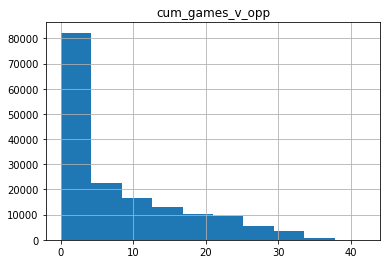

In [64]:
df_reg[['cum_games_v_opp']].hist()

#### Correlation Between cum_games_v_opp and Outcome

In [95]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['cum_games_v_opp'] = df_reg['cum_games_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0, 1])

The correlation is: 0.00


### Tournament

In [57]:
df_tour[['cum_games_v_opp']].describe()

,cum_games_v_opp
count,6518.000000
mean,1.622584
std,4.611857
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,38.000000


In [61]:
se_tour = float(np.std(df_tour[['cum_games_v_opp']])) / ((len(df_tour[['cum_games_v_opp']])) ** (0.5))

print "The standard error is: ", se_tour

The standard error is:  0.057119627001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BE44940>]],
      dtype=object)

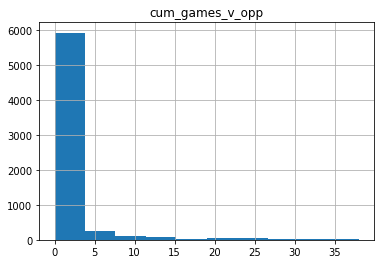

In [73]:
df_tour[['cum_games_v_opp']].hist()

In [94]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['cum_games_v_opp'] = df_tour['cum_games_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0, 1])

The correlation is: 0.00


### Regular Season vs. Tournament

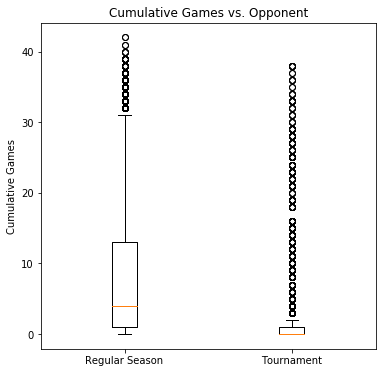

In [72]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Cumulative Games vs. Opponent')
_ = plt.boxplot([df_reg.cum_games_v_opp.dropna(), df_tour.cum_games_v_opp.dropna()])
_ = ax1.set_ylabel('Cumulative Games')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean cumulative games since 2003 vs. a particular opponent in the regular season is 7.9, and is 1.6 during the tournament.  Given that specific teams in the tournament will have faced each other less frequently, this decline in absolute terms makes sense.  Unsurprinsgly, there is a large amount of rightward skew for cumulative games during the regular season as teams normally play opponents that are geographically closer to them more frequently.  However, there is even more rightward skew for cumulative games during the tournament as many of the same teams reach the tournament across seasons, and similarly many teams never reach the tournament.  This creates a much smaller, and frequently matched group of teams in the tournament data set.

The increase in standard error from the regular season (0.022) to the tournament (0.057) is due primarily to the effect of the smaller sample size of the tournament vs. the regular season outweighing the effect of the smaller standard deviation of the tournament vs. the regular season.

Because of the lack of correlation between the cumulative games vs. a particular opponent and the outcome of games, this feature will provide little benefit to the model.

## Game Statistics: Cumulative Wins vs. Opponent

This feature looks at the number of cumulative wins before a given day vs. a particular opponent (since 2003).

### Regular Season

In [82]:
df_reg[['cum_wins_v_opp']].describe()

,cum_wins_v_opp
count,164082.000000
mean,3.959100
std,4.935943
min,0.000000
25%,0.000000
50%,2.000000
75%,6.000000
max,35.000000


In [83]:
se_reg = float(np.std(df_reg[['cum_wins_v_opp']])) / ((len(df_reg[['cum_wins_v_opp']])) ** (0.5))

print "The standard error is: ", se_reg

The standard error is:  0.0121853587777


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000228505C0>]],
      dtype=object)

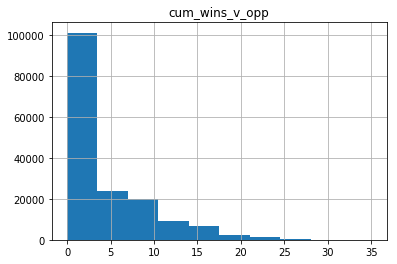

In [84]:
df_reg[['cum_wins_v_opp']].hist()

#### Correlation Between cum_wins_v_opp and Outcome

In [93]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['cum_wins_v_opp'] = df_reg['cum_wins_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0, 1])

The correlation is: 0.08


### Tournament

In [86]:
df_tour[['cum_wins_v_opp']].describe()

,cum_wins_v_opp
count,6518.000000
mean,0.811292
std,2.542198
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,33.000000


In [87]:
se_tour = float(np.std(df_tour[['cum_wins_v_opp']])) / ((len(df_tour[['cum_wins_v_opp']])) ** (0.5))

print "The standard error is: ", se_tour

The standard error is:  0.0314861051388


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B146D30>]],
      dtype=object)

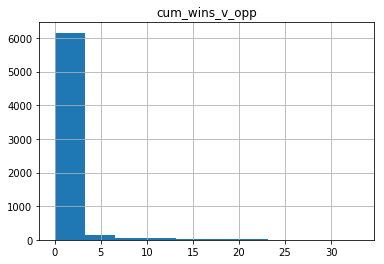

In [88]:
df_tour[['cum_wins_v_opp']].hist()

In [92]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['cum_wins_v_opp'] = df_tour['cum_wins_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0, 1])

The correlation is: 0.04


### Regular Season vs. Tournament

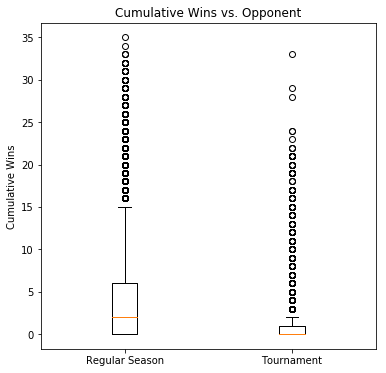

In [91]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Cumulative Wins vs. Opponent')
_ = plt.boxplot([df_reg.cum_wins_v_opp.dropna(), df_tour.cum_wins_v_opp.dropna()])
_ = ax1.set_ylabel('Cumulative Wins')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean cumulative wins since 2003 vs. a particular opponent in the regular season is 4.0, and is 0.8 during the tournament.  Given that specific teams in the tournament will have faced each other less frequently, this decline in absolute terms makes sense.  Additionally, these means are approximately half the value of the means for cumulative games played.


Unsurprinsgly, there is a large amount of rightward skew for cumulative wins during the regular season as teams normally play opponents that are geographically closer to them more frequently.  However, there is even more rightward skew for cumulative games during the tournament as many of the same teams reach the tournament across seasons, and similarly many teams never reach the tournament.  This creates a much smaller, and frequently matched group of teams in the tournament data set.  Additionally, the skew seen is even greater than that for cumulative games played, which makes sense as certain teams are likely to win more due to skill.

The increase in standard error from the regular season (0.012) to the tournament (0.031) is due primarily to the effect of the smaller sample size of the tournament vs. the regular season outweighing the effect of the smaller standard deviation of the tournament vs. the regular season.

Because of the small degree of correlation between the cumulative wins vs. a particular opponent and the outcome of games (0.08 for the regular season, and 0.04 for the tournament), this feature will provide little benefit to the model.

## Game Statistics: Cumulative Win Percent vs. Opponent

This feature looks at the cumulative win percent before a given day vs. a particular opponent (since 2003).

### Regular Season

In [96]:
df_reg[['cum_winpct_v_opp']].describe()

,cum_winpct_v_opp
count,128500.000000
mean,0.500000
std,0.311968
min,0.000000
25%,0.285714
50%,0.500000
75%,0.714286
max,1.000000


In [97]:
se_reg = float(np.std(df_reg[['cum_winpct_v_opp']])) / ((len(df_reg[['cum_winpct_v_opp']])) ** (0.5))

print "The standard error is: ", se_reg

The standard error is:  0.000770154807361


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D103D68>]],
      dtype=object)

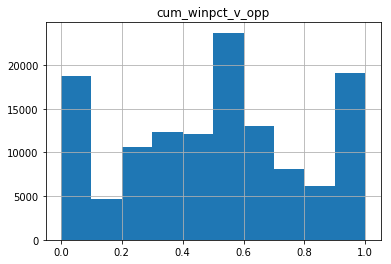

In [98]:
df_reg[['cum_winpct_v_opp']].hist()

#### Correlation Between cum_wins_v_opp and Outcome

In [99]:
df_corr = pd.DataFrame({'Outcome':df_reg['Outcome']})
df_corr['cum_winpct_v_opp'] = df_reg['cum_winpct_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0, 1])

The correlation is: 0.25


### Tournament

In [100]:
df_tour[['cum_winpct_v_opp']].describe()

,cum_winpct_v_opp
count,2482.00000
mean,0.50000
std,0.41623
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [101]:
se_tour = float(np.std(df_tour[['cum_winpct_v_opp']])) / ((len(df_tour[['cum_winpct_v_opp']])) ** (0.5))

print "The standard error is: ", se_tour

The standard error is:  0.0051545314857


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D6D5588>]],
      dtype=object)

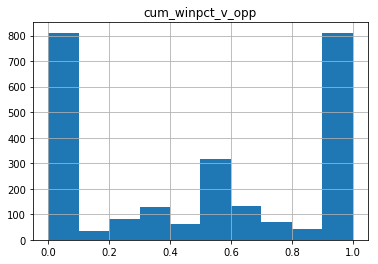

In [102]:
df_tour[['cum_winpct_v_opp']].hist()

In [104]:
df_corr = pd.DataFrame({'Outcome':df_tour['Outcome']})
df_corr['cum_winpct_v_opp'] = df_tour['cum_wins_v_opp']

print 'The correlation is: {0:.2f}'.format(df_corr.corr().iloc[0, 1])

The correlation is: 0.04


### Regular Season vs. Tournament

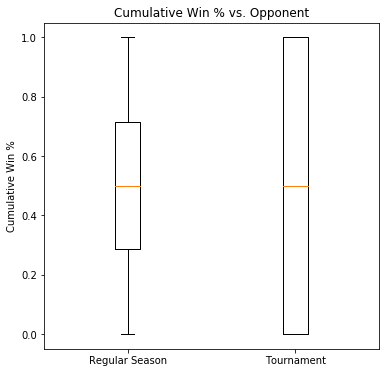

In [105]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = plt.title('Cumulative Win % vs. Opponent')
_ = plt.boxplot([df_reg.cum_winpct_v_opp.dropna(), df_tour.cum_winpct_v_opp.dropna()])
_ = ax1.set_ylabel('Cumulative Win %')
_ = ax1.set_xticklabels(['Regular Season','Tournament'])

### Analysis

The mean cumulative wins since 2003 vs. a particular opponent in the regular season is 0.5, and is also 0.5 during the tournament.  As combinations of teams are included from the winning perspective and losing perspective, (i.e. data for team A vs. team B, and team B vs. team A), this makes sense.

Both the regular season and tournament data shows some signs of normality around the mean, but both have significant upward skew for lower and higher win percents.  This makes sense as there are a large number of teams that have only played each other a few times, and have had a large percent of wins or losses vs. each other during these matchups.

The increase in standard error from the regular season (0.0008) to the tournament (0.005) is due primarily to the effect of the smaller sample size of the tournament vs. the regular season outweighing the effect of the smaller standard deviation of the tournament vs. the regular season.

Because of the small degree of correlation between the cumulative wins vs. a particular opponent and the outcome of games (0.25 for the regular season, and 0.04 for the tournament), this feature will provide little benefit to the model.

# Ignore for now

In [ ]:
# Winning / Losing Field Goal Attempts - Percent of field goals attempted by winning vs. losing teams

df_reg['win_lose_fg_attempts'] = df_reg['WFGA'] / df_reg['LFGA']
df_reg['win_lose_fg_attempts'].head()

In [ ]:
# Winning / Losing Field Goals Made - Percent of field goals made by winning vs. losing teams

df_reg['win_lose_fg_made'] = df_reg['WFGM'] / df_reg['LFGM']
df_reg['win_lose_fg_made'].head()

In [ ]:
# Winning / Losing Free Throw Attempts - Percent of free throws attempted by winning vs. losing team

df_reg['win_lose_ft_attempts'] = df_reg['WFTA'] / df_reg['LFTA']
df_reg['win_lose_ft_attempts'].head()


In [ ]:
# Winning / Losing Free Throws Made - Percent of free throws made by winning vs. losing team

df_reg['win_lose_ft_made'] = df_reg['WFTM'] / df_reg['LFTM']
df_reg['win_lose_ft_made'].head()


## EDA

### Summary Statistics

In [ ]:
df_reg[['win_lose_fg_attempts', 'win_lose_fg_made']].describe()

In [ ]:
df_reg[['WFGA', 'LFGA', 'win_lose_fg_attempts', 'WFGM', 'LFGM', 'win_lose_fg_made']].describe()

In [ ]:
df_reg[['win_lose_ft_attempts', 'win_lose_ft_made']].describe()

In [ ]:
df_reg[['WFTA', 'LFTA', 'win_lose_ft_attempts', 'WFTM', 'LFTM', 'win_lose_ft_made']].describe()

### Charts and Graphs

In [ ]:
data = [df_reg['win_lose_fg_attempts'], df_reg['win_lose_fg_made'],]
labels = ['win_lose_fg_attempts', 'win_lose_fg_made']
plt.figure()
plt.boxplot(data)
plt.title('Boxplot for Winning vs. Losing Team Field Goal Attempts & Field Goals Made')
#plt.xlabel('Combined Shooting %, Winning Team Shooting %, Losing Team Shooting %')

plt.xticks([1, 2], ['win_lose_fg_attempts', 'win_lose_fg_made'])

In [ ]:
data = [df_reg['win_lose_ft_attempts'], df_reg['win_lose_ft_made'],]
labels = ['win_lose_ft_attempts', 'win_lose_ft_made']
plt.figure()
plt.boxplot(data)
plt.title('Boxplot for Winning vs. Losing Team Free Throw Attempts & Free Throws Made')
#plt.xlabel('Combined Shooting %, Winning Team Shooting %, Losing Team Shooting %')

plt.xticks([1, 2], ['win_lose_ft_attempts', 'win_lose_ft_made'])

In [ ]:
t, p = ttest_ind(df_reg['win_lose_fg_attempts'], df_reg['win_lose_fg_made'], equal_var=True)
print("ttest_ind: t = {0:.2f}  p = {1:.4f}".format(t, p))

## Commentary

When looking at the winning team vs. losing team Field Goal Attempts ratio distribution, it is interesting that on averge the losing teams attempt more field goals (two and three point shots) in a given game.  The mean of the distribution is 0.990770, which tilts slightly towards the losing team attempts.

However (and unsurprisingly), the winning teams make more field goals.  The mean of the winning vs. losing team field goals made distribution is 1.186750, which tilts towards the winning team.  Even for the 25th percentile of the distribution, the ratio is ~ 1.0 : 1.0 for the fields goals made by the winning vs. losing teams.